Defaulting to user installation because normal site-packages is not writeable
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 174, ncost: 34572.420353033616
Run: 1, iteration: 2/100, moves: 85, ncost: 33884.05001641747
Run: 1, iteration: 3/100, moves: 64, ncost: 33323.64009161613
Run: 1, iteration: 4/100, moves: 89, ncost: 32728.509151393107
Run: 1, iteration: 5/100, moves: 85, ncost: 31797.891982278208
Run: 1, iteration: 6/100, moves: 72, ncost: 31268.25917597894
Run: 1, iteration: 7/100, moves: 53, ncost: 31003.09882231022
Run: 1, iteration: 8/100, moves: 35, ncost: 30855.297617868993
Run: 1, iteration: 9/100, moves: 21, ncost: 30743.61081786384
Run: 1, iteration: 10/100, moves: 13, ncost: 30705.38894083295
Run: 1, iteration: 11/100, moves: 0, ncost: 30705.38894083295
Init: initializing centroids
Init: initializing clusters
Starting iterations..

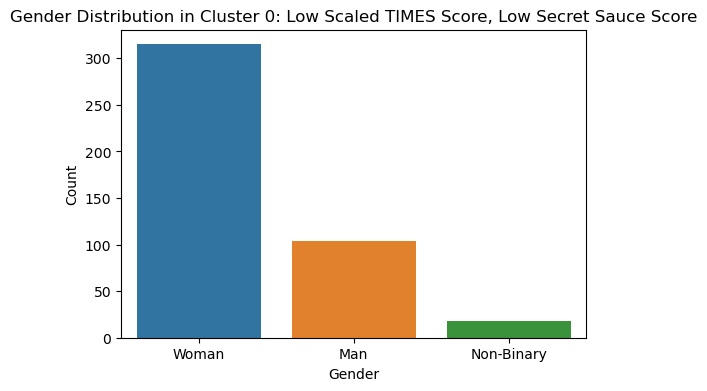

Cluster 1: High Scaled TIMES Score, Low Secret Sauce Score
Gender Distribution:
Woman    228
Man       74
Trans      4
Name: Gender, dtype: int64




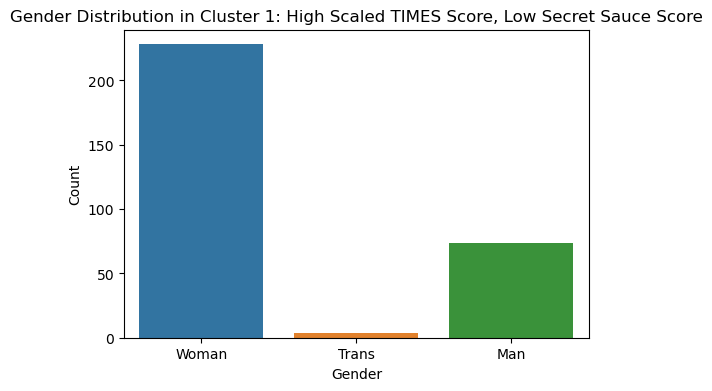

Cluster 2: Low Scaled TIMES Score, High Secret Sauce Score
Gender Distribution:
Woman         255
Man           126
Non-Binary      6
Trans           1
Name: Gender, dtype: int64




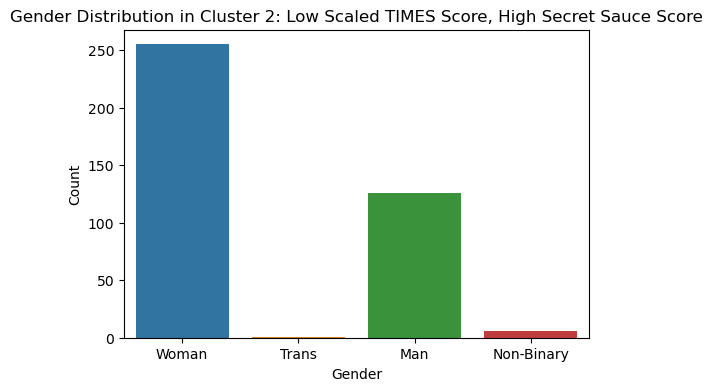

Cluster 3: High Scaled TIMES Score, High Secret Sauce Score
Gender Distribution:
Woman         104
Man            46
Non-Binary      3
Name: Gender, dtype: int64




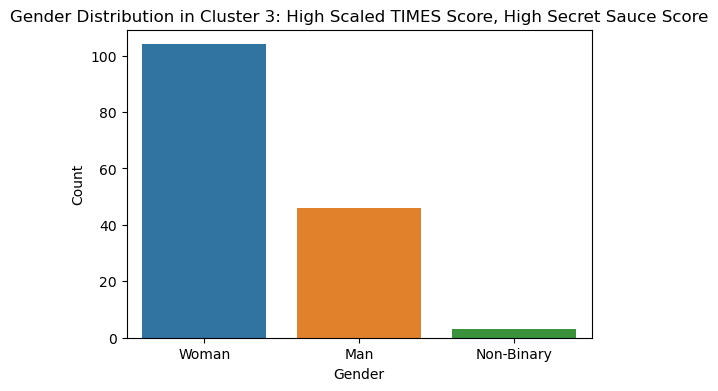

In [3]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("D:\Downloads D\Final_Clean_Merged_for_Team.csv")  

# Drop duplicated rows
data.drop_duplicates(inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Select relevant features for clustering
numerical_features = ['Scaled TIMES Score']
categorical_features = ['Values', 'Self Awareness', 'Sense of Power', 'Relationships']

# Combine numerical and categorical features
X = data[numerical_features + categorical_features]

# Initialize KPrototypes object
kproto = KPrototypes(n_clusters=4, verbose=2)  # Adjust number of clusters as needed

# Fit the model
clusters = kproto.fit_predict(X, categorical=[1, 2, 3, 4])

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Define cluster names based on the desired characteristics
cluster_names = {
    0: "Low Scaled TIMES Score, Low Secret Sauce Score",
    1: "High Scaled TIMES Score, Low Secret Sauce Score",
    2: "Low Scaled TIMES Score, High Secret Sauce Score",
    3: "High Scaled TIMES Score, High Secret Sauce Score"
}

# Print out characteristics of each cluster
for cluster_id, cluster_name in cluster_names.items():
    print(f"Cluster {cluster_id}: {cluster_name}")
    cluster_data = data[data['Cluster'] == cluster_id]
    gender_distribution = cluster_data['Gender'].value_counts()
    print("Gender Distribution:")
    print(gender_distribution)
    print("\n")

    # Visualize gender distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=cluster_data)
    plt.title(f"Gender Distribution in Cluster {cluster_id}: {cluster_name}")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 162, ncost: 30654.86828639129
Run: 1, iteration: 2/100, moves: 77, ncost: 29989.661957496504
Run: 1, iteration: 3/100, moves: 50, ncost: 29791.20761627283
Run: 1, iteration: 4/100, moves: 24, ncost: 29747.33663709535
Run: 1, iteration: 5/100, moves: 0, ncost: 29747.33663709535
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 332, ncost: 41980.83778475123
Run: 2, iteration: 2/100, moves: 192, ncost: 37742.754005133225
Run: 2, iteration: 3/100, moves: 132, ncost: 35397.756131707545
Run: 2, iteration: 4/100, moves: 96, ncost: 34542.40072296215
Run: 2, iteration: 5/100, moves: 78, ncost: 33958.84436664189
Run: 2, iteration: 6/100, moves: 62, ncost: 33430.27908144565
Run: 2, iteration: 7/100, moves: 73, ncost: 32901.95765277698
Run: 2, iterat

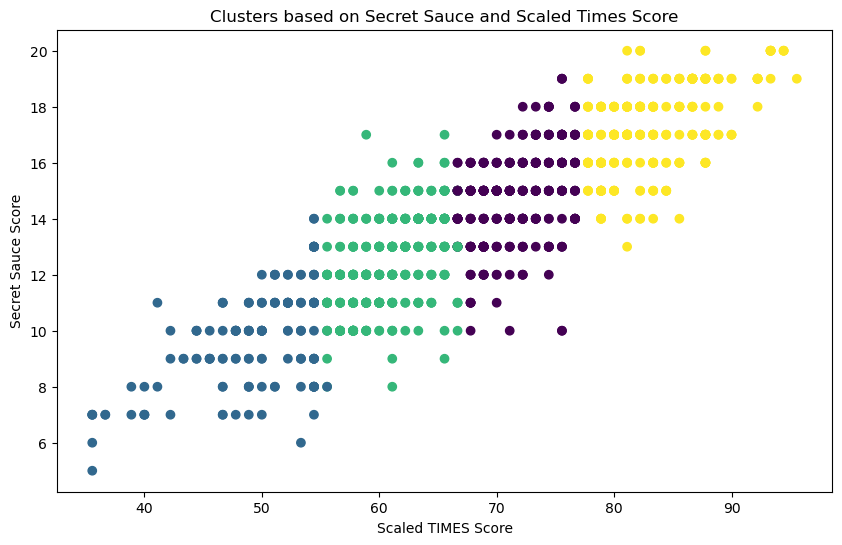

Cluster 0: Low Scaled Times Score, Low Secret Sauce Score
Cluster 1: High Scaled Times Score, Low Secret Sauce Score
Cluster 2: Low Scaled Times Score, High Secret Sauce Score
Cluster 3: High Scaled Times Score, High Secret Sauce Score


In [5]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:\Downloads D\Final_Clean_Merged_for_Team.csv") 

# Drop duplicated rows
data.drop_duplicates(inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Define the thresholds for scaled times score and secret sauce score
scaled_times_score_thresholds = {'low': (0, 30), 'high': (60, 100)}
secret_sauce_thresholds = {'low': (0, 7), 'high': (13, 20)}

# Define numerical and categorical features
numerical_features = ['Scaled TIMES Score']
categorical_features = ['Values', 'Self Awareness', 'Sense of Power', 'Relationships']

# Combine numerical and categorical features
X = data[numerical_features + categorical_features]

# Assign cluster labels based on the thresholds
def assign_cluster_label(row):
    scaled_times_score_label = None
    secret_sauce_label = None
    
    # Assign label for scaled times score
    for label, (low, high) in scaled_times_score_thresholds.items():
        if low <= row['Scaled TIMES Score'] <= high:
            scaled_times_score_label = label
            break
    
    # Calculate secret sauce score
    secret_sauce_score = row['Values'] + row['Self Awareness'] + row['Sense of Power'] + row['Relationships']
    
    # Assign label for secret sauce score
    for label, (low, high) in secret_sauce_thresholds.items():
        if low <= secret_sauce_score <= high:
            secret_sauce_label = label
            break
    
    # Combine labels to form cluster label
    if scaled_times_score_label == 'low' and secret_sauce_label == 'low':
        return 'Low Scaled Times Score, Low Secret Sauce Score'
    elif scaled_times_score_label == 'high' and secret_sauce_label == 'low':
        return 'High Scaled Times Score, Low Secret Sauce Score'
    elif scaled_times_score_label == 'low' and secret_sauce_label == 'high':
        return 'Low Scaled Times Score, High Secret Sauce Score'
    elif scaled_times_score_label == 'high' and secret_sauce_label == 'high':
        return 'High Scaled Times Score, High Secret Sauce Score'
    else:
        return 'Unknown'

# Initialize KPrototypes object
kproto = KPrototypes(n_clusters=4, verbose=2)  # Adjust number of clusters as needed

# Fit the model
clusters = kproto.fit_predict(X.values, categorical=[1, 2, 3, 4])

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Scaled TIMES Score'], data['Values'] + data['Self Awareness'] + data['Sense of Power'] + data['Relationships'], c=clusters, cmap='viridis')
plt.title('Clusters based on Secret Sauce and Scaled Times Score')
plt.xlabel('Scaled TIMES Score')
plt.ylabel('Secret Sauce Score')
plt.show()

# Print the cluster names
cluster_names = {
    0: 'Low Scaled Times Score, Low Secret Sauce Score',
    1: 'High Scaled Times Score, Low Secret Sauce Score',
    2: 'Low Scaled Times Score, High Secret Sauce Score',
    3: 'High Scaled Times Score, High Secret Sauce Score'
}

for cluster_num, cluster_name in cluster_names.items():
    print(f"Cluster {cluster_num}: {cluster_name}")


<Figure size 1000x500 with 0 Axes>

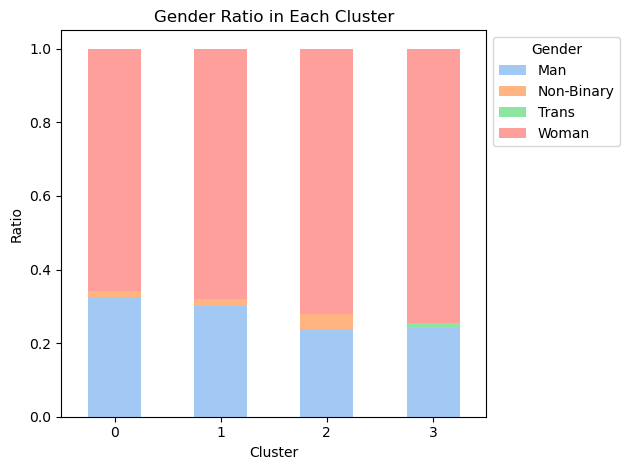

<Figure size 1000x500 with 0 Axes>

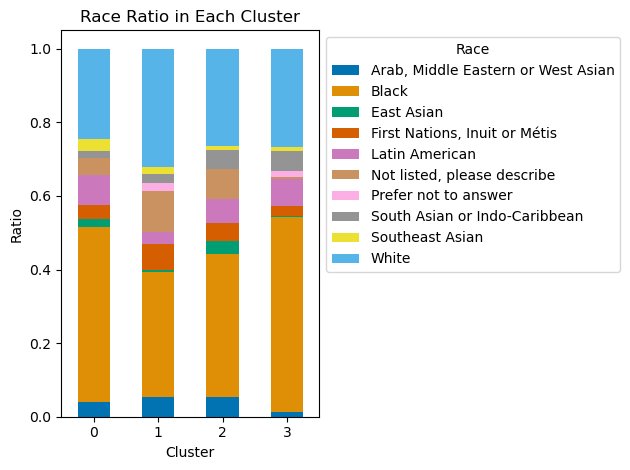

<Figure size 1000x500 with 0 Axes>

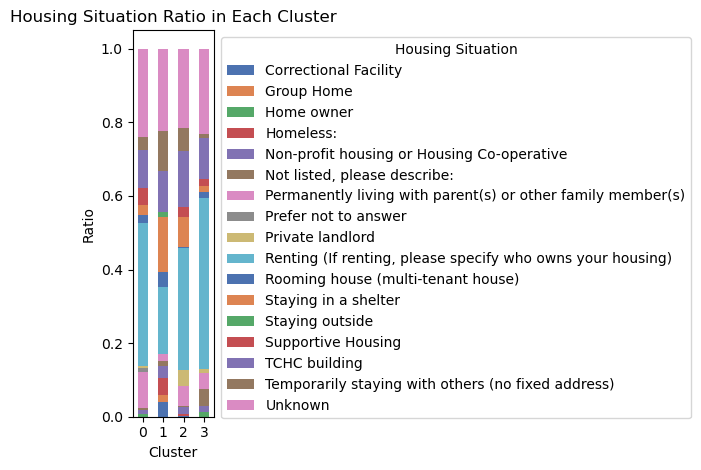

Cluster 0: Low Scaled Times Score, Low Secret Sauce Score
Cluster 1: High Scaled Times Score, Low Secret Sauce Score
Cluster 2: Low Scaled Times Score, High Secret Sauce Score
Cluster 3: High Scaled Times Score, High Secret Sauce Score


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Group data by cluster and gender, race, and housing situation
gender_ratio = data.groupby(['Cluster', 'Gender']).size().unstack()
race_ratio = data.groupby(['Cluster', 'Race']).size().unstack()
housing_ratio = data.groupby(['Cluster', 'Housing Situation']).size().unstack()

# Calculate the ratio of each category within each cluster
gender_ratio = gender_ratio.div(gender_ratio.sum(axis=1), axis=0)
race_ratio = race_ratio.div(race_ratio.sum(axis=1), axis=0)
housing_ratio = housing_ratio.div(housing_ratio.sum(axis=1), axis=0)

# Define cluster names
cluster_names = {
    0: 'Low Scaled Times Score, Low Secret Sauce Score',
    1: 'High Scaled Times Score, Low Secret Sauce Score',
    2: 'Low Scaled Times Score, High Secret Sauce Score',
    3: 'High Scaled Times Score, High Secret Sauce Score'
}

# Plot bar plots for gender ratio
plt.figure(figsize=(10, 5))
sns.set_palette("pastel")
ax1 = gender_ratio.plot(kind='bar', stacked=True)
plt.title('Gender Ratio in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot bar plots for race ratio
plt.figure(figsize=(10, 5))
sns.set_palette("colorblind")
ax2 = race_ratio.plot(kind='bar', stacked=True)
plt.title('Race Ratio in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.legend(title='Race', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot bar plots for housing situation ratio
plt.figure(figsize=(10, 5))
sns.set_palette("deep")
ax3 = housing_ratio.plot(kind='bar', stacked=True)
plt.title('Housing Situation Ratio in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.legend(title='Housing Situation', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print cluster names
for cluster, name in cluster_names.items():
    print(f'Cluster {cluster}: {name}')


Cluster Success Prediction:
Cluster
0    1
1    0
2    1
3    1
Name: Success, dtype: int32


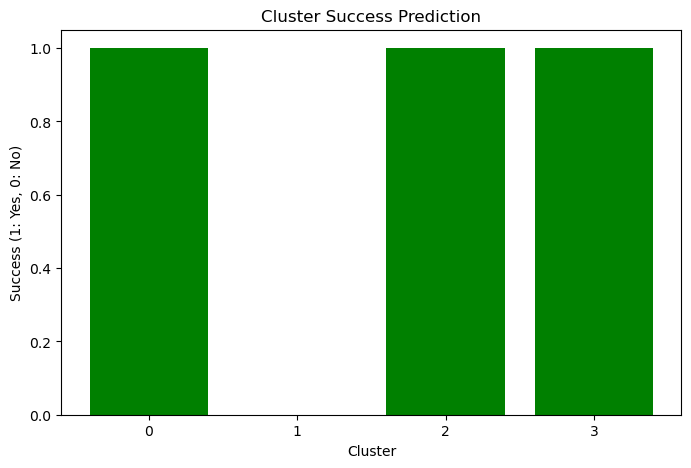

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load your dataset
# Assuming your dataset is stored in a variable named 'data'

# Step 1: Identify the latest record for each ID
latest_records = data.sort_values('Assessment Completed Date').groupby('Participant Id').last().reset_index()

# Step 2: Check if Scaled TIMES Score is more than 60 for the latest record
latest_records['Success'] = (latest_records['Scaled TIMES Score'] > 60).astype(int)

# Step 3: Merge the success column back to the original data
data = pd.merge(data, latest_records[['Participant Id', 'Success']], on='Participant Id', how='left')

# Step 4: Group the data by cluster and predict if each cluster will succeed
cluster_success = data.groupby('Cluster')['Success'].mean()
cluster_success = (cluster_success > 0.5).astype(int)

# Step 5: Print cluster success prediction
print("Cluster Success Prediction:")
print(cluster_success)

# Visualize the cluster success prediction
plt.figure(figsize=(8, 5))
plt.bar(cluster_success.index, cluster_success.values, color=['red' if val == 0 else 'green' for val in cluster_success.values])
plt.title('Cluster Success Prediction')
plt.xlabel('Cluster')
plt.ylabel('Success (1: Yes, 0: No)')
plt.xticks(cluster_success.index)
plt.show()


Random Forest Model:
Accuracy: 1.0
ROC AUC Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        62

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



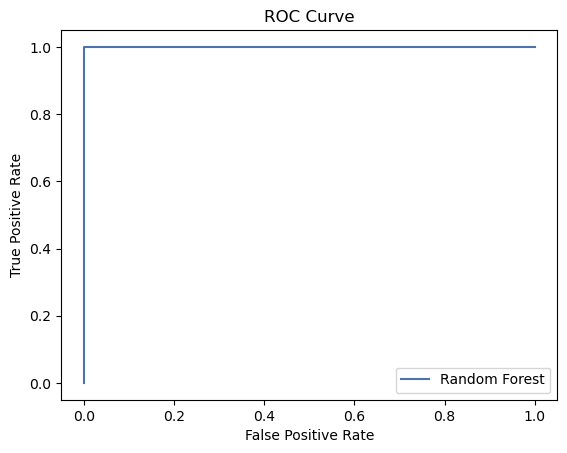


Support Vector Machine (SVM) Model:
Accuracy: 1.0
ROC AUC Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        62

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



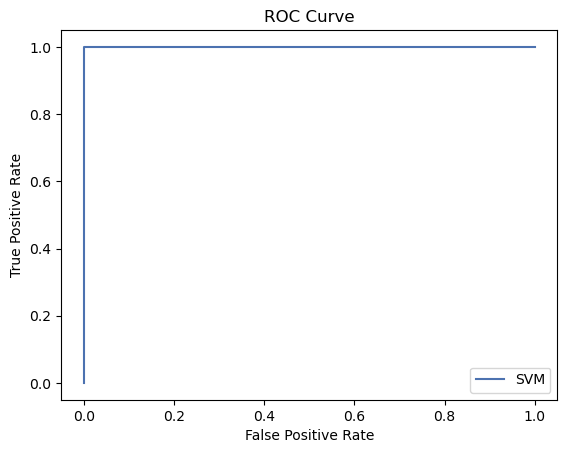

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing your dataset

# Step 1: Identify the last assessment record for each participant
last_assessment = data.groupby('Participant Id').last().reset_index()

# Step 2: Label success based on TIMES score
last_assessment['Success'] = (last_assessment['Scaled TIMES Score'] >= 40).astype(int)

# Step 3: Split the Dataset
X = last_assessment[['Age', 'TIMES Total Scores']]  # Features
y = last_assessment['Success']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Selection - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Model Evaluation - Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("ROC AUC Score:", rf_roc_auc)
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Visualize ROC curve for Random Forest
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 6: Model Selection - Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 7: Model Evaluation - SVM
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_pred)

print("\nSupport Vector Machine (SVM) Model:")
print("Accuracy:", svm_accuracy)
print("ROC AUC Score:", svm_roc_auc)
print("Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Visualize ROC curve for SVM
svm_y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred_proba)
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
